![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import initializers, optimizers, backend, metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras

2022-05-15 13:34:05.099928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-15 13:34:05.099948: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


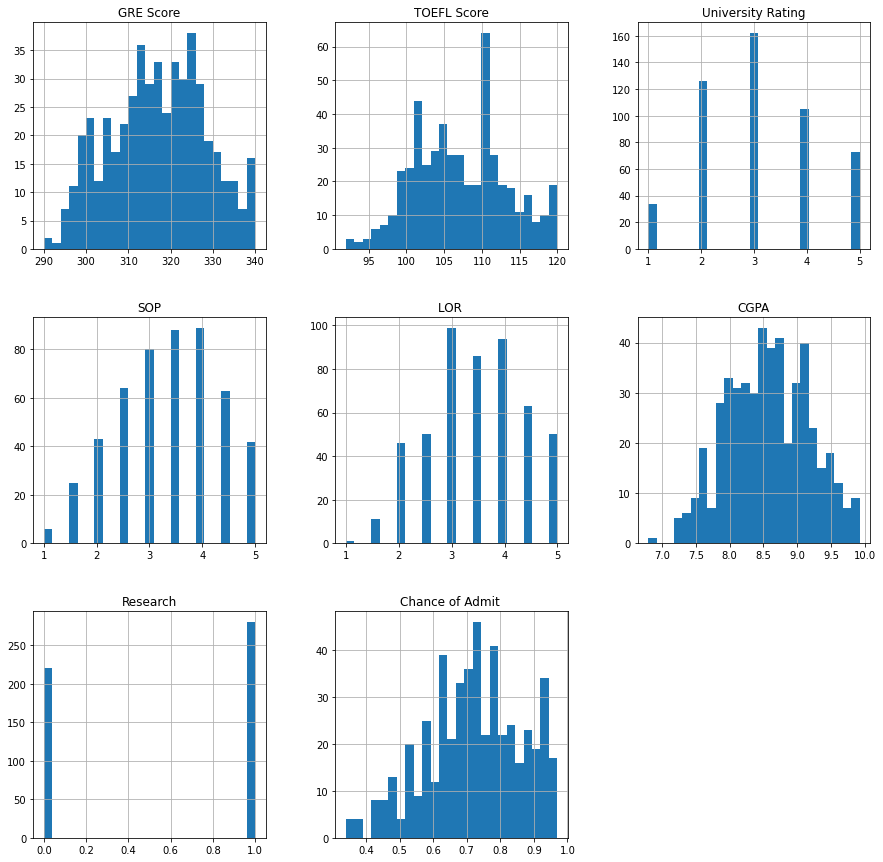

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins = 25, figsize = (15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
x = data.drop(data.columns[-1], axis = 1)
# Definición de variable de interés (y)
y = pd.DataFrame(np.array(data[data.columns[-1]]), columns = ['labels'])

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 22)

In [7]:
# Normalización de variables predictoras (x) con la función StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
x_train = pd.DataFrame(data = scaler.fit_transform(x_train), 
                       columns = x_train.columns, 
                       index = x_train.index)

x_test = pd.DataFrame(data = scaler.transform(x_test), 
                      columns = x_test.columns, 
                      index = x_test.index)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
# Definición de dimensiones de salida, varaibles de interés
output_var = y_train.shape[1]
print(output_var, 'output variable')

1 output variable


In [9]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = x_train.shape[1]
print(dims, 'input variables')

7 input variables


In [10]:
backend.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape = (dims, )))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


2022-05-15 13:34:07.307784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-15 13:34:07.307802: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-15 13:34:07.307815: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (asustuf): /proc/driver/nvidia/version does not exist
2022-05-15 13:34:07.307923: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer = 'sgd', loss = 'mean_squared_error',
              metrics = [metrics.mean_absolute_error,
                        metrics.mean_squared_error,])

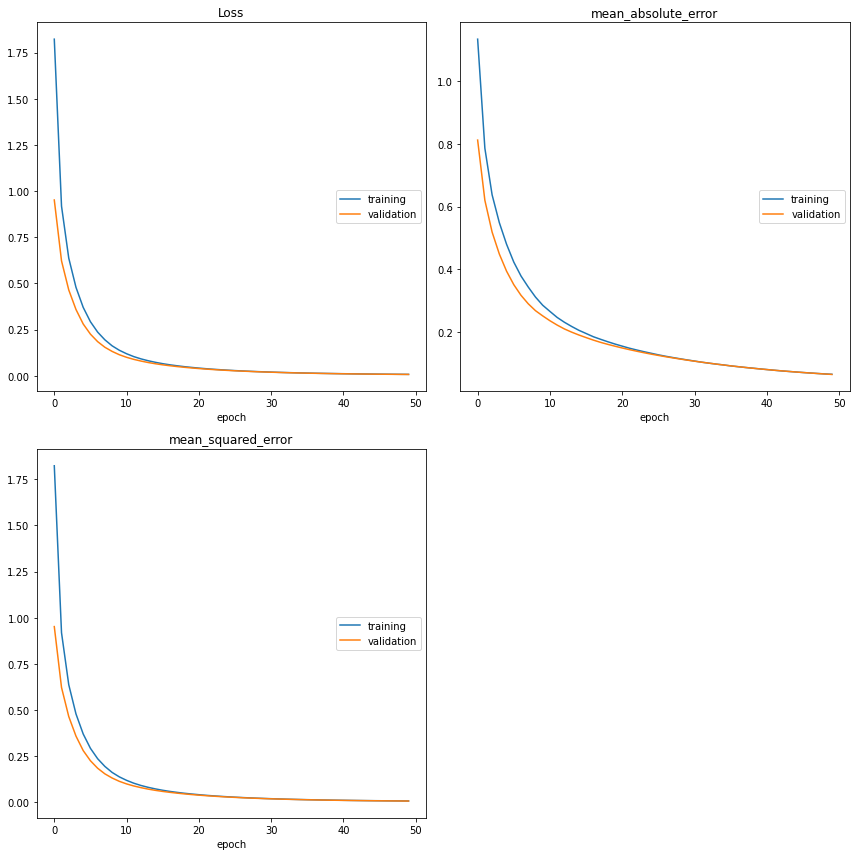

Loss
	training         	 (min:    0.007, max:    1.823, cur:    0.007)
	validation       	 (min:    0.007, max:    0.952, cur:    0.007)
mean_absolute_error
	training         	 (min:    0.066, max:    1.134, cur:    0.066)
	validation       	 (min:    0.065, max:    0.812, cur:    0.065)
mean_squared_error
	training         	 (min:    0.007, max:    1.823, cur:    0.007)
	validation       	 (min:    0.007, max:    0.952, cur:    0.007)
11/11 [==============================] - 0s 24ms/step - loss: 0.0074 - mean_absolute_error: 0.0656 - mean_squared_error: 0.0074 - val_loss: 0.0071 - val_mean_absolute_error: 0.0651 - val_mean_squared_error: 0.0071


In [12]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(x_train, y_train, 
          verbose = 1, 
          epochs = 50, 
          validation_data = (x_test, y_test),
          callbacks = [PlotLossesKeras()])

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [13]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
x_train, x_test2, y_train, y_test2 = train_test_split(x_train, y_train, test_size = 0.3, 
                                                      random_state = 22)

In [14]:
backend.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape = ( dims, ), activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer = 'sgd', loss = 'mean_squared_error',
              metrics = [metrics.mean_absolute_error,
                        metrics.mean_squared_error])

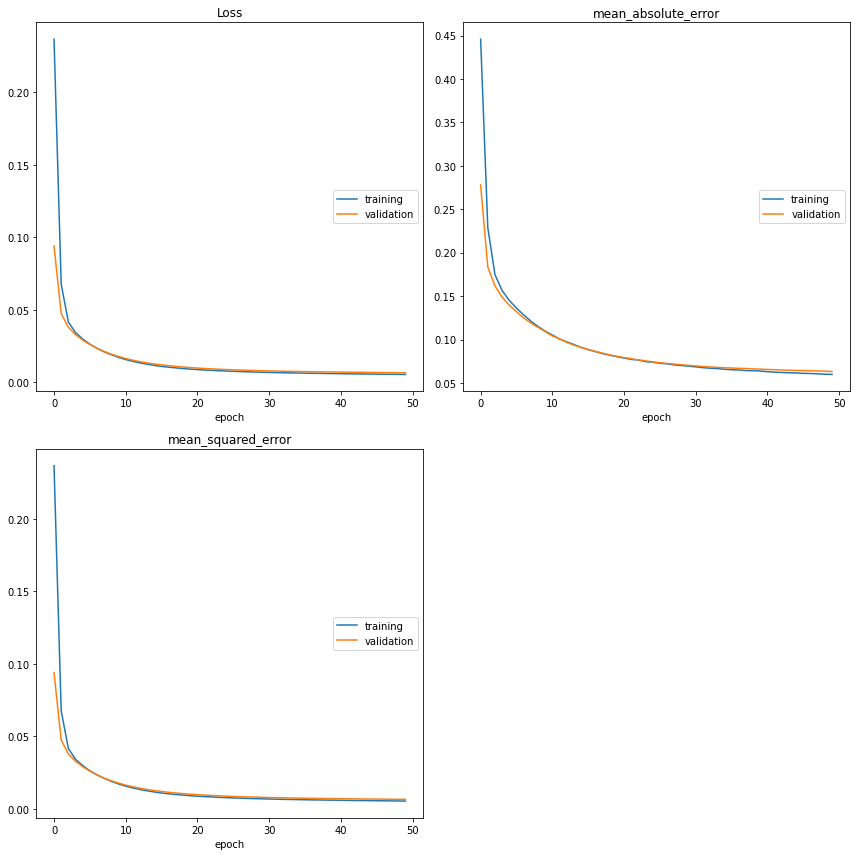

Loss
	training         	 (min:    0.005, max:    0.237, cur:    0.005)
	validation       	 (min:    0.007, max:    0.094, cur:    0.007)
mean_absolute_error
	training         	 (min:    0.060, max:    0.446, cur:    0.060)
	validation       	 (min:    0.063, max:    0.278, cur:    0.063)
mean_squared_error
	training         	 (min:    0.005, max:    0.237, cur:    0.005)
	validation       	 (min:    0.007, max:    0.094, cur:    0.007)
8/8 [==============================] - 0s 34ms/step - loss: 0.0054 - mean_absolute_error: 0.0598 - mean_squared_error: 0.0054 - val_loss: 0.0066 - val_mean_absolute_error: 0.0632 - val_mean_squared_error: 0.0066


In [16]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(x_train, y_train,  
          epochs = 50, 
          validation_data = (x_test2, y_test2),
          callbacks = [PlotLossesKeras()])

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [17]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
x_train, x_test3, y_train, y_test3 = train_test_split(x_train, y_train, test_size = 0.3, 
                                                      random_state = 22)

In [24]:
backend.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape = ( dims, ), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', 
              metrics = [metrics.mean_absolute_error, metrics.mean_squared_error])

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [25]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2, verbose = 1) 

In [26]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose = 0, save_best_only = True)

In [27]:
# Entrenamiento de la red neuronal con 50 épocas, early stopping, dropout
history = model.fit(x_train, y_train, 
                    verbose = True, 
                    epochs = 50, 
                    batch_size = 128,
                    validation_data = (x_test3, y_test3),
                    callbacks = [best_model, early_stop])

Epoch 1/50
2/2 [==============================] - 0s 84ms/step - loss: 0.4903 - mean_absolute_error: 0.6867 - mean_squared_error: 0.4903 - val_loss: 0.4330 - val_mean_absolute_error: 0.6496 - val_mean_squared_error: 0.4330
Epoch 2/50
2/2 [==============================] - 0s 21ms/step - loss: 0.4273 - mean_absolute_error: 0.6401 - mean_squared_error: 0.4273 - val_loss: 0.3320 - val_mean_absolute_error: 0.5672 - val_mean_squared_error: 0.3320
Epoch 3/50
2/2 [==============================] - 0s 22ms/step - loss: 0.3361 - mean_absolute_error: 0.5633 - mean_squared_error: 0.3361 - val_loss: 0.2413 - val_mean_absolute_error: 0.4792 - val_mean_squared_error: 0.2413
Epoch 4/50
2/2 [==============================] - 0s 20ms/step - loss: 0.2542 - mean_absolute_error: 0.4824 - mean_squared_error: 0.2542 - val_loss: 0.1719 - val_mean_absolute_error: 0.3976 - val_mean_squared_error: 0.1719
Epoch 5/50
2/2 [==============================] - 0s 20ms/step - loss: 0.1917 - mean_absolute_error: 0.4177 

Epoch 38/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0293 - mean_absolute_error: 0.1281 - mean_squared_error: 0.0293 - val_loss: 0.0220 - val_mean_absolute_error: 0.1260 - val_mean_squared_error: 0.0220
Epoch 39/50
2/2 [==============================] - 0s 21ms/step - loss: 0.0254 - mean_absolute_error: 0.1274 - mean_squared_error: 0.0254 - val_loss: 0.0216 - val_mean_absolute_error: 0.1250 - val_mean_squared_error: 0.0216
Epoch 40/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0273 - mean_absolute_error: 0.1334 - mean_squared_error: 0.0273 - val_loss: 0.0212 - val_mean_absolute_error: 0.1239 - val_mean_squared_error: 0.0212
Epoch 41/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0207 - mean_absolute_error: 0.1186 - mean_squared_error: 0.0207 - val_loss: 0.0210 - val_mean_absolute_error: 0.1231 - val_mean_squared_error: 0.0210
Epoch 42/50
2/2 [==============================] - 0s 20ms/step - loss: 0.0253 - mean_absolute_error: 0.

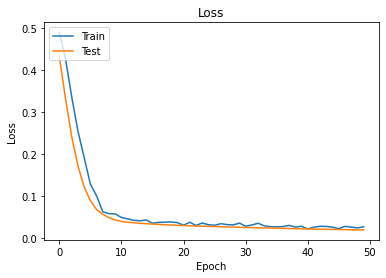

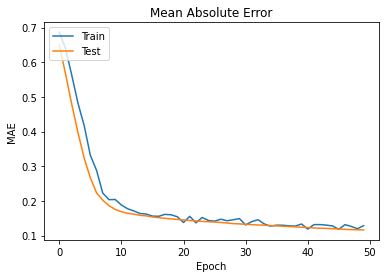

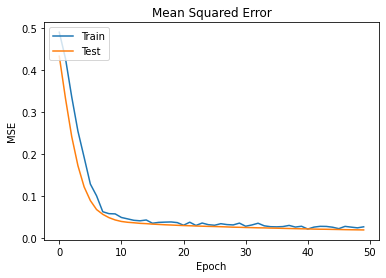

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [23]:
# Celda 4
